In [1]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\saivi\\Downloads\\MicrosoftStock.csv")

In [3]:
df.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [4]:
df.shape

(1259, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [6]:
df.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


In [7]:
df['date']=pd.to_datetime(df['date'])

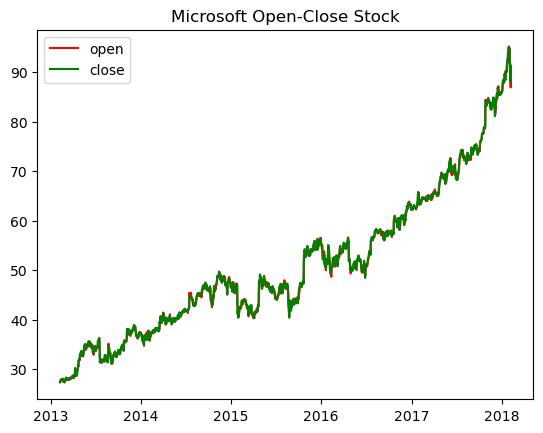

In [8]:
plt.plot(df['date'],df['open'],color='red',label="open")
plt.plot(df['date'], df['close'], color="green", label="close") 
plt.title("Microsoft Open-Close Stock") 
plt.legend() 

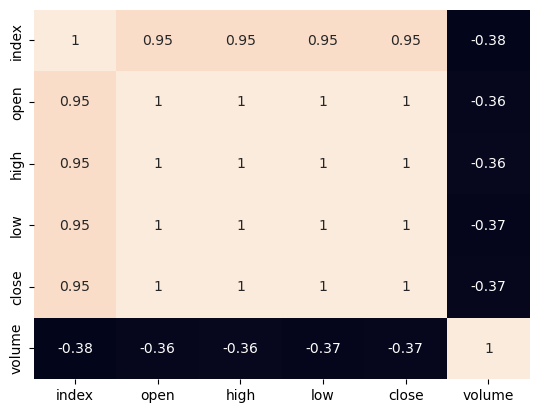

In [9]:
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,cbar=False)
plt.show()

In [10]:
prediction = df.loc[(df['date']> datetime(2013, 1, 1))& (df['date']< datetime(2018, 1, 1))]

Text(0.5, 1.0, 'Microsoft Stock Prices')

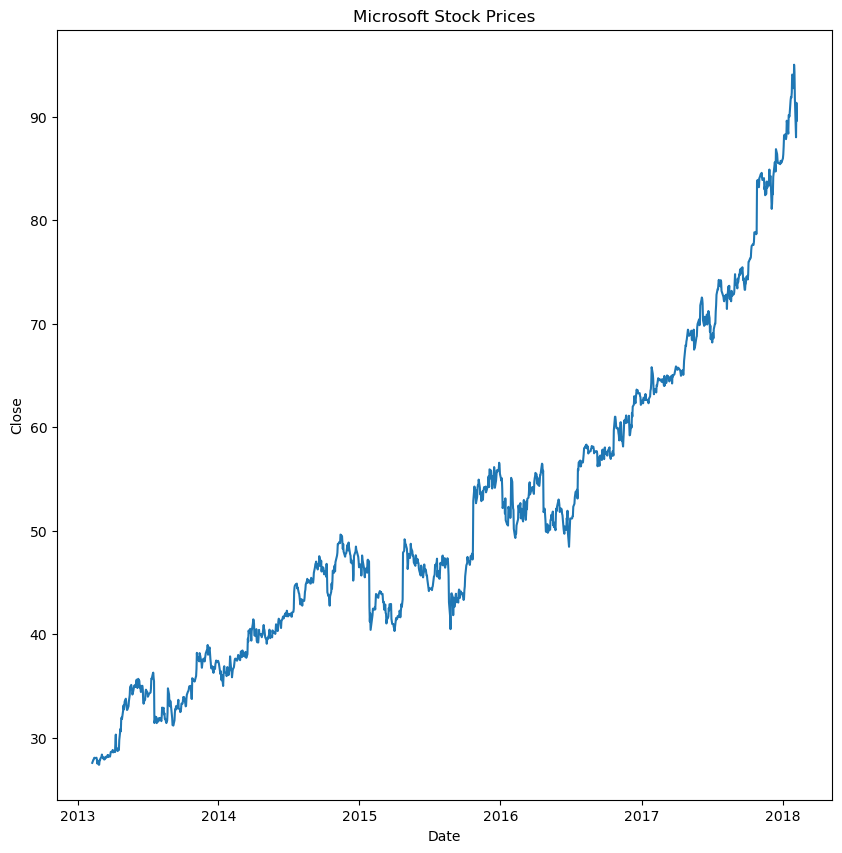

In [11]:
plt.figure(figsize=(10, 10))
plt.plot(df['date'], df['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")

In [12]:
df_close = df.filter(['close']) 
dataset = df_close.values 
training = int(np.ceil(len(dataset) * .95))

In [13]:
ss=StandardScaler()
ss=ss.fit_transform(dataset)


In [14]:
## test train manual split

train_data = ss[0:int(training), :] 


x_train = [] 
y_train = [] 

# considering 60 as the batch size, 
# create the X_train and y_train 

for i in range(60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0]) 
    y_train.append(train_data[i, 0]) 

x_train, y_train = np.array(x_train), np.array(y_train) 
X_train = np.reshape(x_train, 
                    (x_train.shape[0], 
                    x_train.shape[1], 1))

In [15]:
## building model

model=keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

print(model.summary())


c:\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [16]:
from keras.metrics import RootMeanSquaredError 
model.compile(optimizer='adam', loss='mae', metrics=[RootMeanSquaredError()]) 

history = model.fit(X_train, y_train,epochs=20) 

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3862 - root_mean_squared_error: 0.5290
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1112 - root_mean_squared_error: 0.1468
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0957 - root_mean_squared_error: 0.1297
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0913 - root_mean_squared_error: 0.1200
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0862 - root_mean_squared_error: 0.1141
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0844 - root_mean_squared_error: 0.1113
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0859 - root_mean_squared_error: 0.1146
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0826 - root_mean_squared_error: 0.1110
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0791 - root_mean_squared_error: 0.1069
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0794 - root_mean_squared_error: 0.1072

In [17]:
testing = ss[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(testing)):
    x_test.append(testing[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test,
                    (x_test.shape[0],
                     x_test.shape[1], 1))

pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 362ms/step


C:\Users\saivi\AppData\Local\Temp\ipykernel_26908\3171720993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


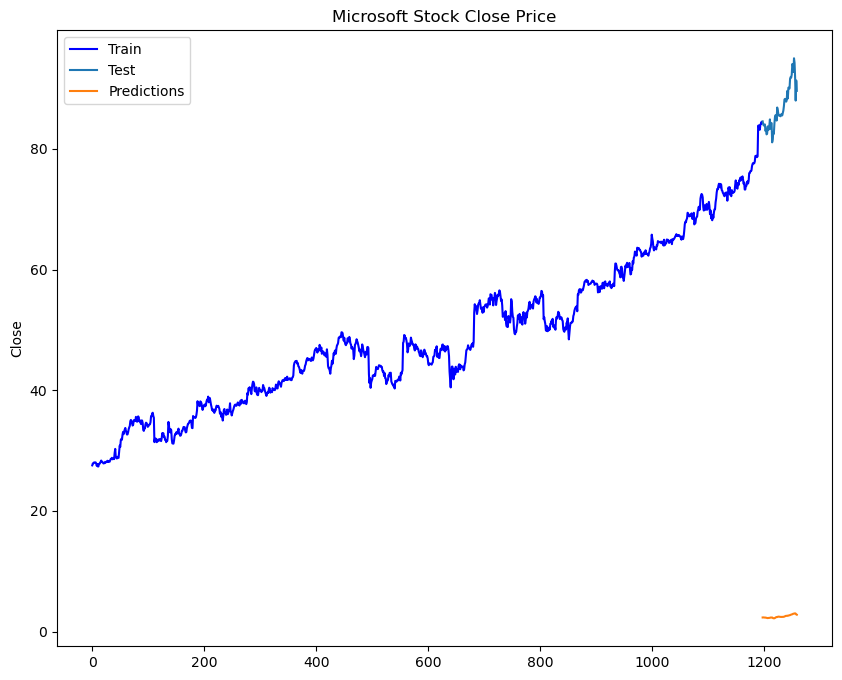

In [18]:
train = df[:training]
test = df[training:]
test['Predictions'] = pred

plt.figure(figsize=(10, 8))
plt.plot(train['close'], c="b")
plt.plot(test[['close', 'Predictions']])
plt.title('Microsoft Stock Close Price')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])